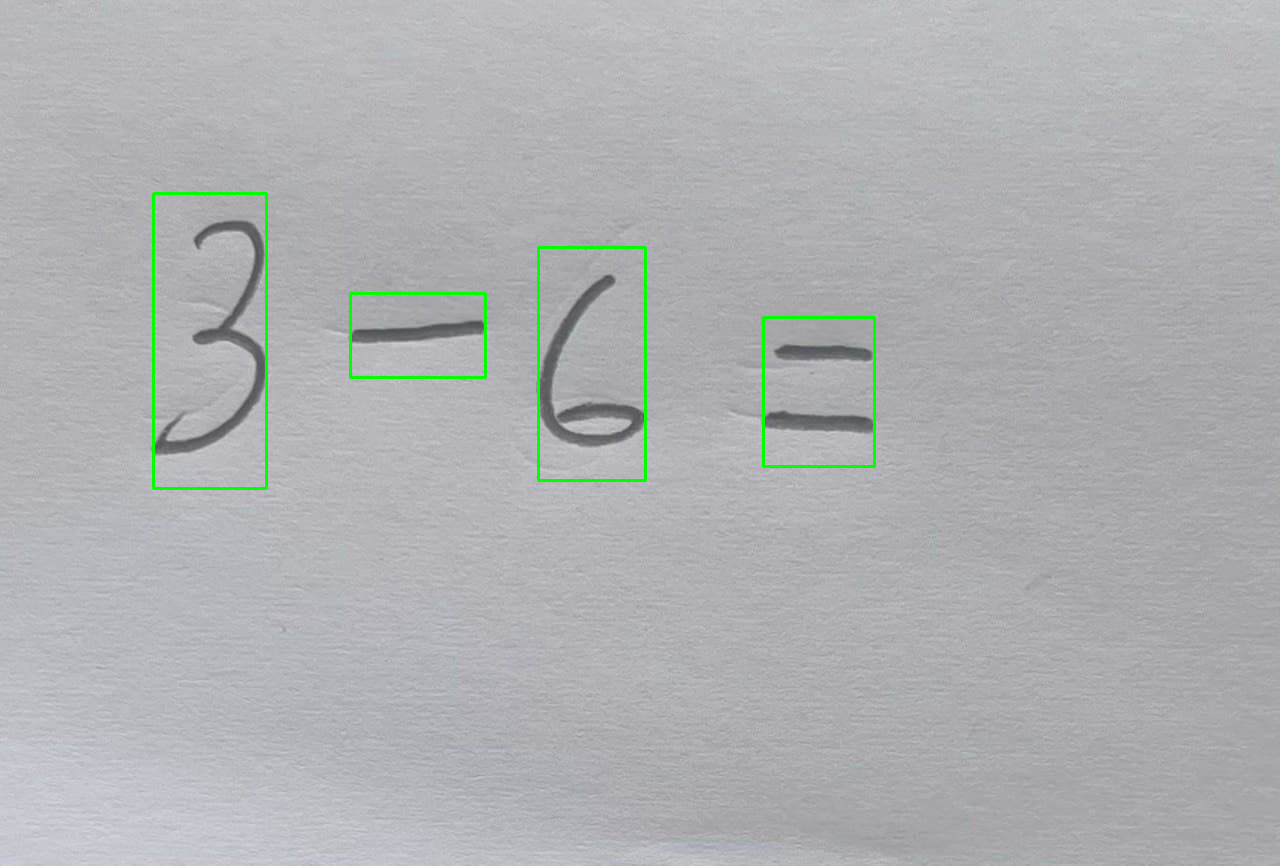

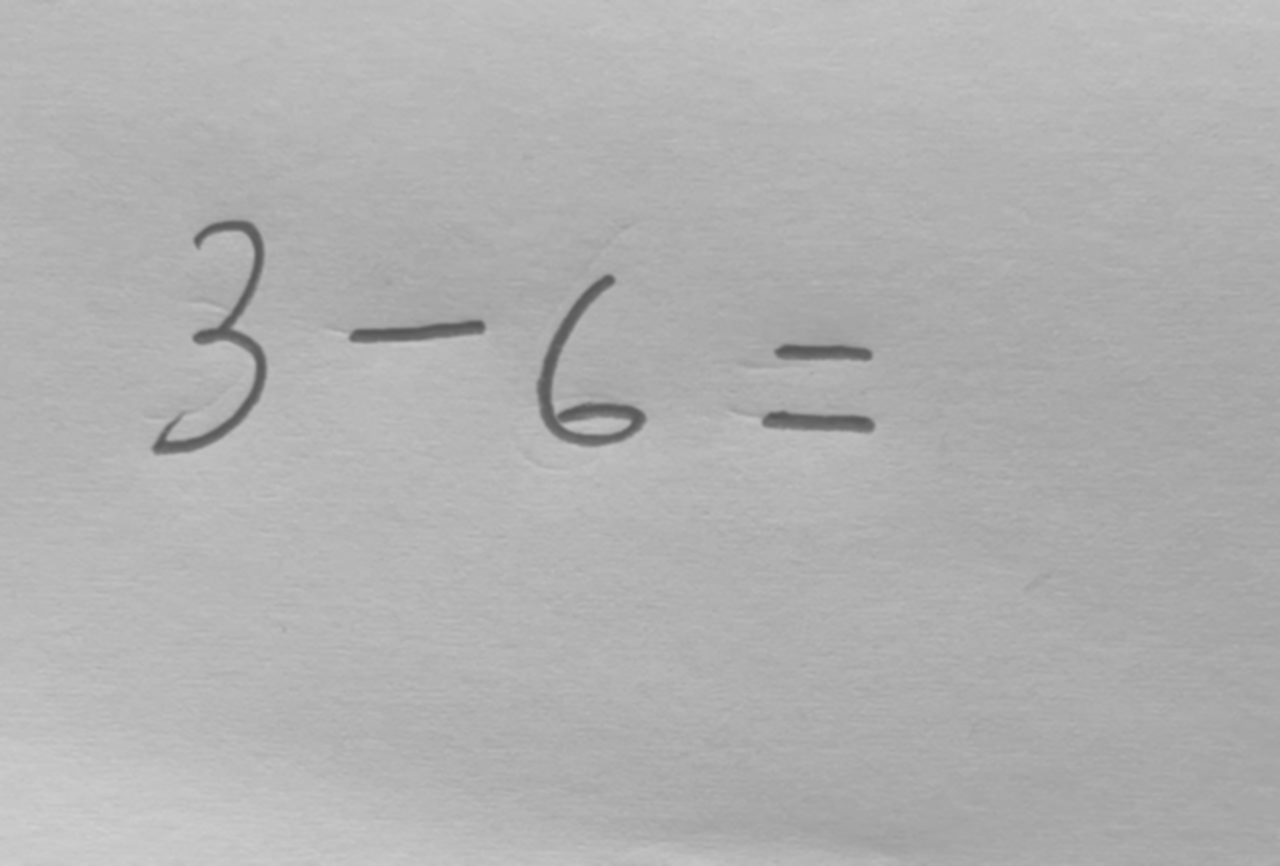

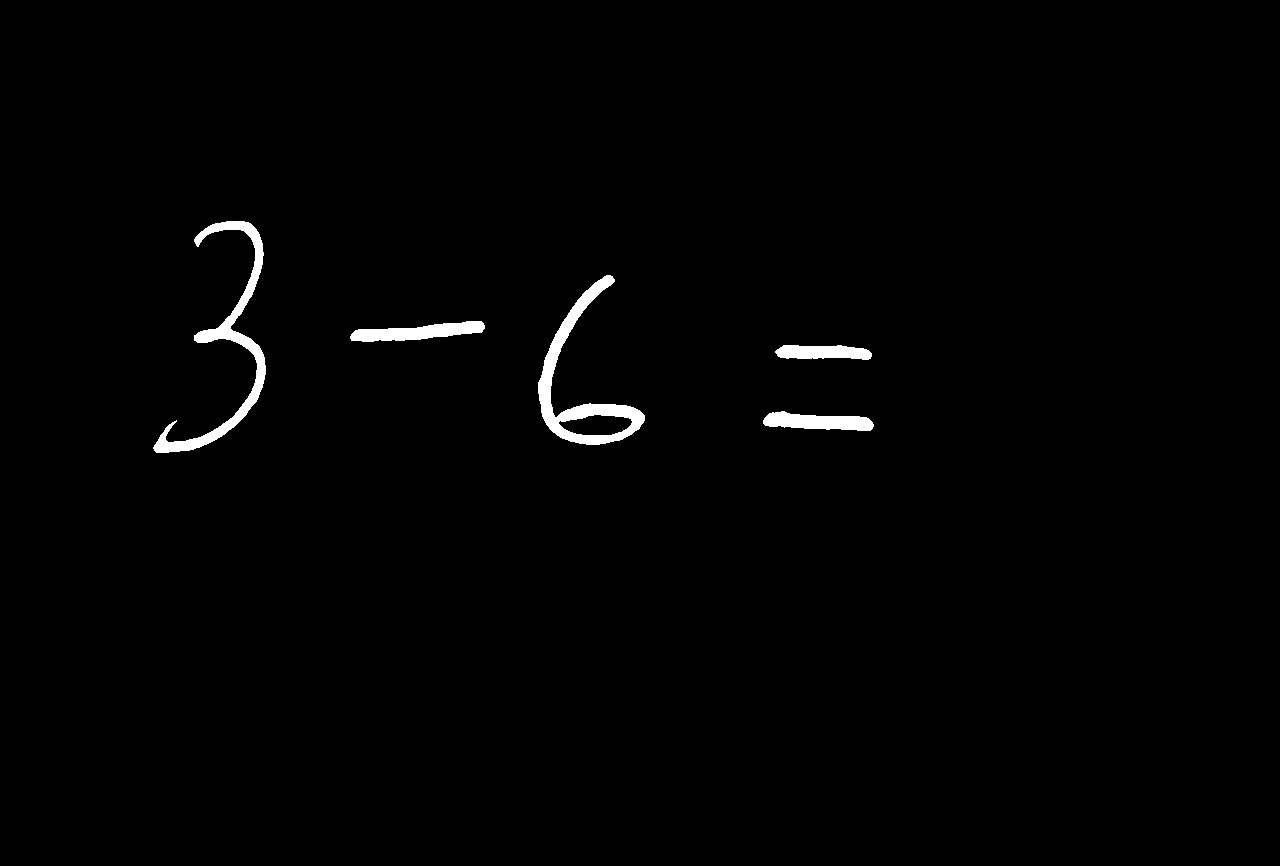

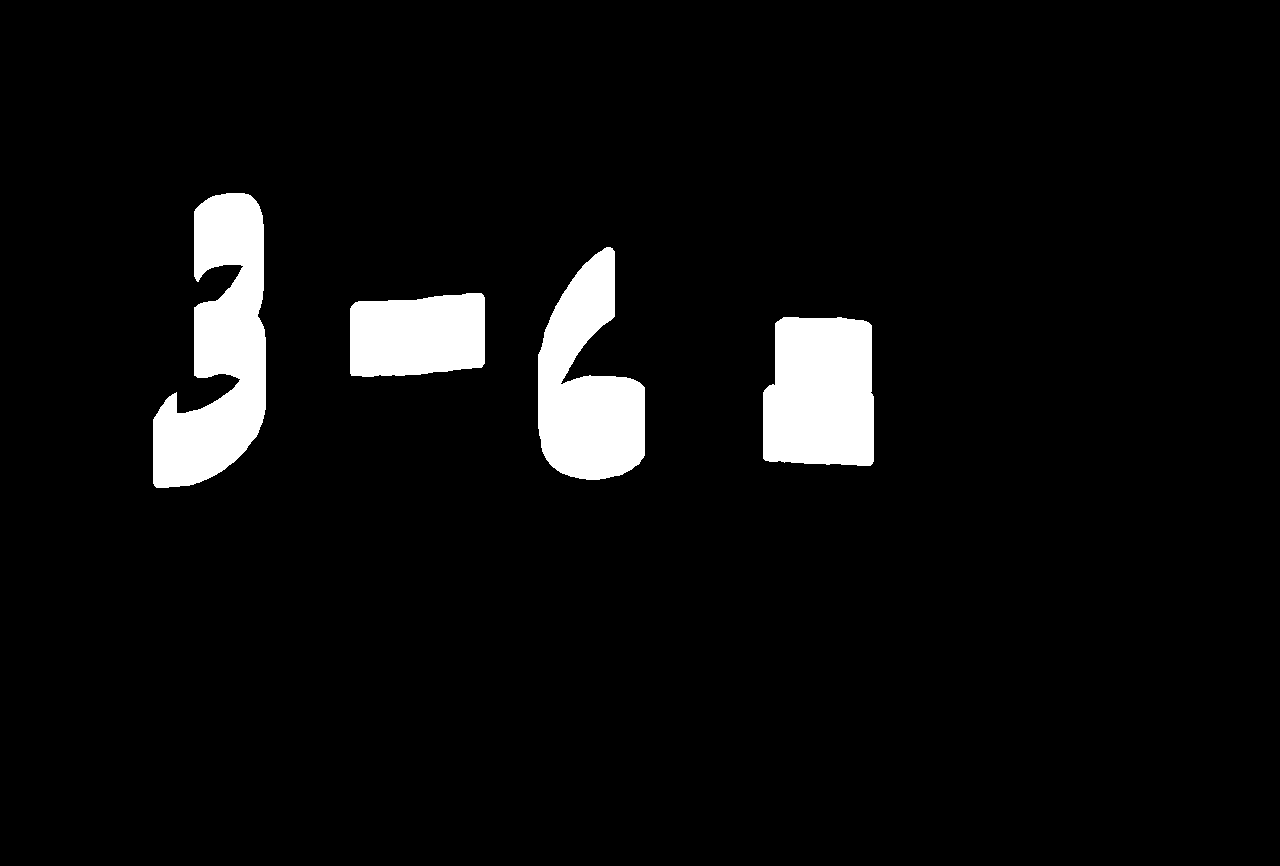

-1

In [2]:
# import the necessary packages
import numpy as np
import cv2
import imutils
from google.colab.patches import cv2_imshow

# load the image, convert it to grayscale, and blur it to remove noise
image = cv2.imread("test8.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

# threshold the image
ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)

# dilate the white portions, kernel used to identify special cases
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,10))
dilate = cv2.dilate(thresh1, kernel , iterations=7)
#dilate = cv2.dilate(thresh1, None, iterations=7)

# find contours in the image
cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0]

orig = image.copy()
i = 0

h_avg = 0

for cnt in cnts:
    #Identify if cnt is 

    # Check the area of contour, if it is very small ignore it
    #if(cv2.contourArea(cnt) < 1000 or cv2.contourArea(cnt) > 7000):
    if(cv2.contourArea(cnt) < 500):
        continue

    # Filtered countours are detected
    x,y,w,h = cv2.boundingRect(cnt)

    # Taking ROI of the cotour
    roi = image[y:y+h, x:x+w]
    # Mark them on the image if you want
    cv2.rectangle(orig,(x,y),(x+w,y+h),(0,255,0),2)

    # Average height

    # Save your contours or characters
    cv2.imwrite("roi" + str(i) + ".png", roi)

    i = i + 1 

cv2_imshow(orig)
cv2_imshow(gray)
cv2_imshow(thresh1)
cv2_imshow(dilate)
cv2.waitKey(0)
